# Pre-processing 

## Data Augmentation 

In [1]:
import os

In [2]:
train_arc = os.listdir("./data/archive/train")
test_arc = os.listdir("./data/archive/test")
train_arc.sort()
test_arc.sort()
print('Train conditions: ', train_arc)
print('Test conditions: ', test_arc)

Train conditions:  ['Acne and Rosacea Photos', 'Bullous Disease Photos', 'Eczema Photos', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Vascular Tumors']
Test conditions:  ['Acne and Rosacea Photos', 'Bullous Disease Photos', 'Eczema Photos', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Vascular Tumors']


In [3]:
train_path = "./data/archive/train"
img_size = 300
batch = 64

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



def preprocess(train_path, img_size, batch):
  train_datagen = ImageDataGenerator(rescale=(1./255),
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     brightness_range=[0.2,1.2],
                                     rotation_range=20,
                                     channel_shift_range=50,
                                     horizontal_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=train_path,
                                                      batch_size=batch,
                                                      class_mode='categorical',
                                                      target_size=(img_size, img_size))

  
  return train_generator

2024-02-24 05:55:03.444913: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 05:55:03.444961: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 05:55:03.446738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 05:55:03.457793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 05:55:05.317942: W tensorflow/compiler/tf2

In [6]:
train_generator=preprocess(train_path, img_size, batch)

Found 7797 images belonging to 9 classes.


(64, 300, 300, 3)
[0. 0. 0. 0. 0. 1. 0. 0. 0.]


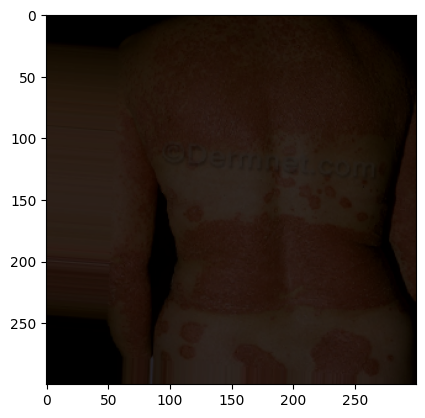

(64, 300, 300, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0.]


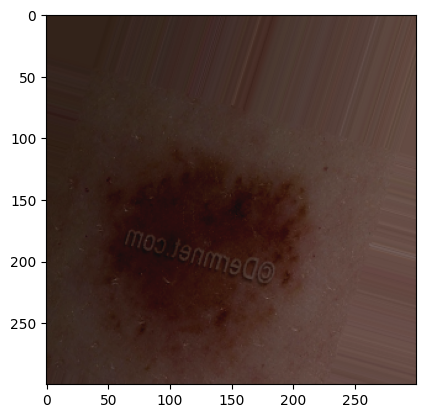

(64, 300, 300, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0.]


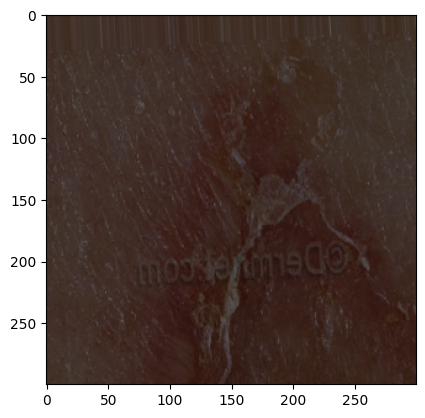

(64, 300, 300, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0.]


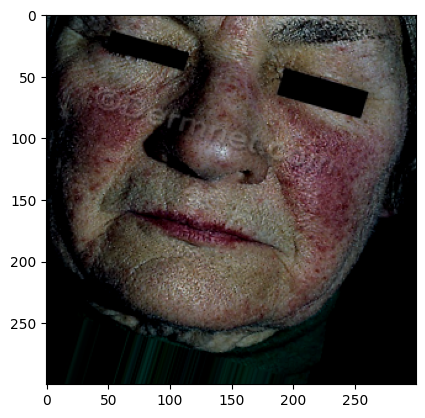

(64, 300, 300, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0.]


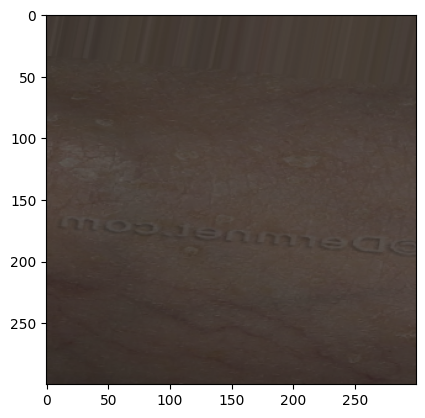

In [7]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)  
    print(label[0])
    plt.imshow(img[0])
    plt.show()

In [ ]:
class_names = train_generator.class_indices
class_names

{'Acne and Rosacea Photos': 0,
 'Bullous Disease Photos': 1,
 'Eczema Photos': 2,
 'Melanoma Skin Cancer Nevi and Moles': 3,
 'Poison Ivy Photos and other Contact Dermatitis': 4,
 'Psoriasis pictures Lichen Planus and related diseases': 5,
 'Seborrheic Keratoses and other Benign Tumors': 6,
 'Tinea Ringworm Candidiasis and other Fungal Infections': 7,
 'Vascular Tumors': 8}

## Data augmentation with Skin Change for just 1 image

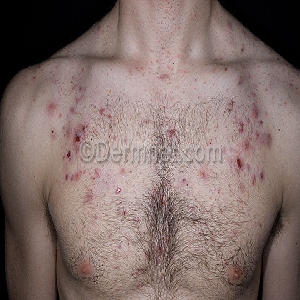

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './data/archive/train/Acne and Rosacea Photos/acne-cystic-6.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img

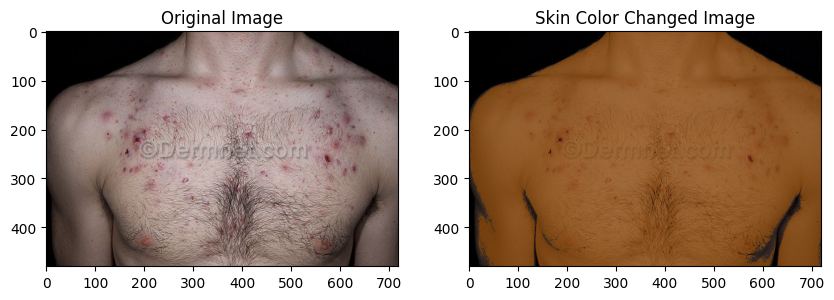

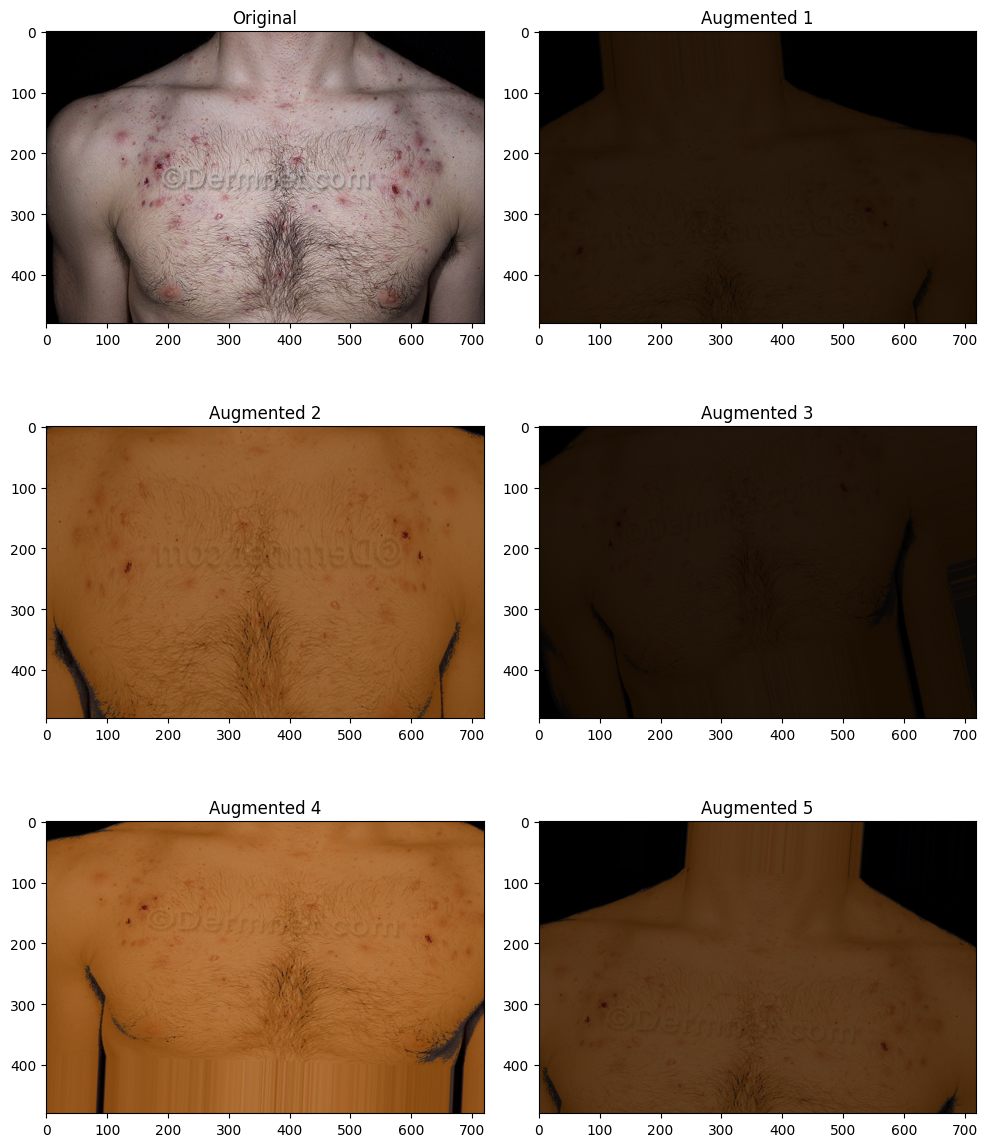

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def change_skin_color_v1(path_face, alpha=0.7, skincolor_low=np.array([0, 10, 60]),
                         skincolor_high=np.array([180, 150, 255]), desired_color_brg=(2, 70, 140)):
    # Read the input face image
    img_main_face = cv2.imread(path_face)

    # Convert BGR to HSV
    hsv = cv2.cvtColor(img_main_face, cv2.COLOR_BGR2HSV)

    # Create the HSV mask
    mask = cv2.inRange(hsv, skincolor_low, skincolor_high)

    # Change image to brown where we found pink
    img_main_face[mask > 0] = desired_color_brg

    # Blending block start
    # Load images for blending
    src1 = img_main_face
    src2 = cv2.imread(path_face)

    if src2 is None:
        print("Error loading src2")
        return None

    # Actually blend images
    result_final = cv2.addWeighted(src1, alpha, src2, 1 - alpha, 0.0)
    # Blending block end

    return result_final


path_face = img_path
result_image = change_skin_color_v1(path_face)

if result_image is not None:
    # Plot the original and resulting images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(path_face), cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Resulting image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Skin Color Changed Image')

    plt.show()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=(1./255),
    shear_range=0.2,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2, 1.2],
    rotation_range=20,
    horizontal_flip=True,
)

img_array = np.expand_dims(result_image, axis=0)

augmented_images = []

for _ in range(5):  # Generate 5 augmented versions of the image
    augmented_img = datagen.flow(img_array).next()[0]
    augmented_images.append(augmented_img)  # Corrected line

# Plotting the original and augmented images in a 3x2 matrix
plt.figure(figsize=(10, 12))

# Original image
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(path_face), cv2.COLOR_BGR2RGB))
plt.title('Original')

# Augmented images
for i in range(5):
    plt.subplot(3, 2, i + 2)
    plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Augmented {i + 1}')

plt.tight_layout()
plt.show()


## Data augmentation with Skin Change

Number of images in ./data/archive/train/Acne and Rosacea Photos/: 840
Number of images for skin color change and augmentation (20%): 168
Number of images to plot (5%): 5


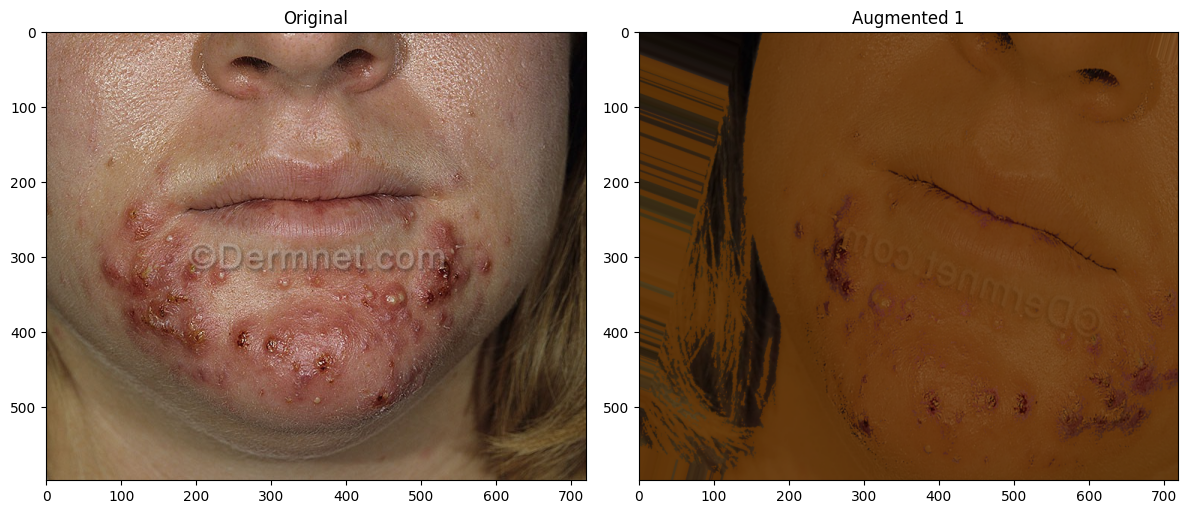

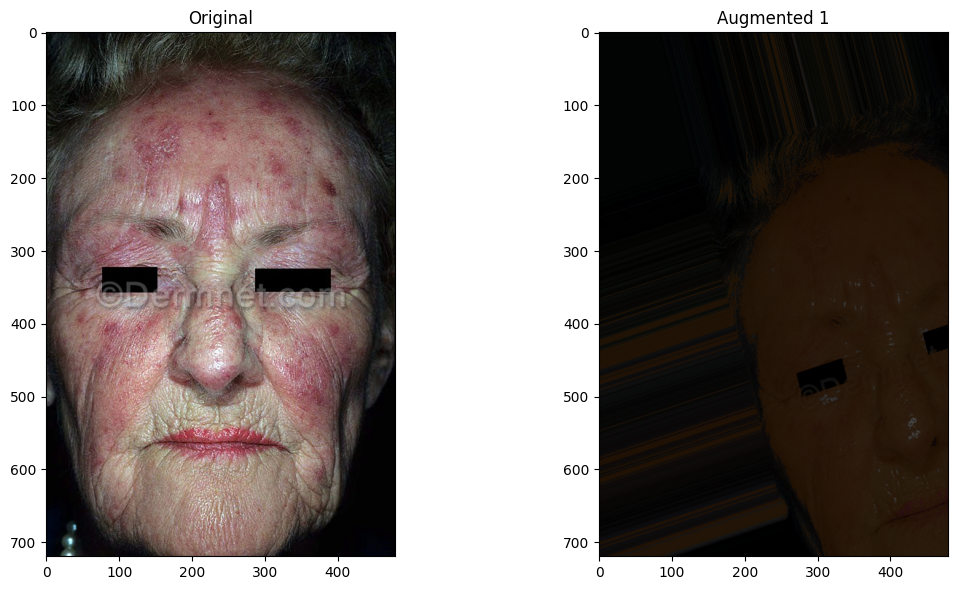

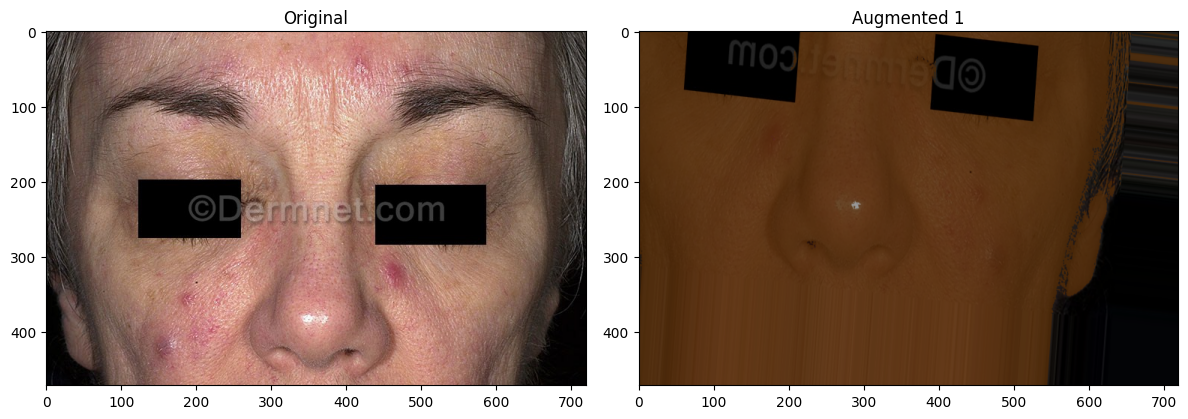

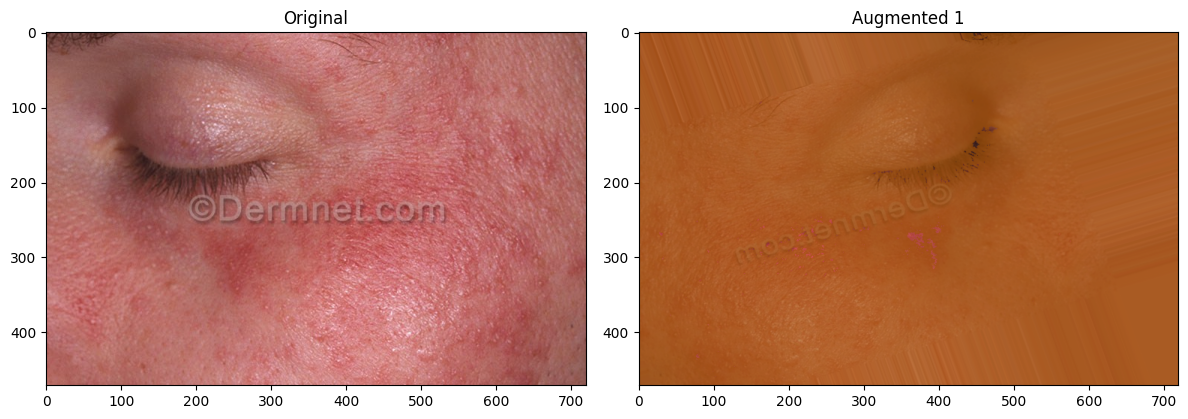

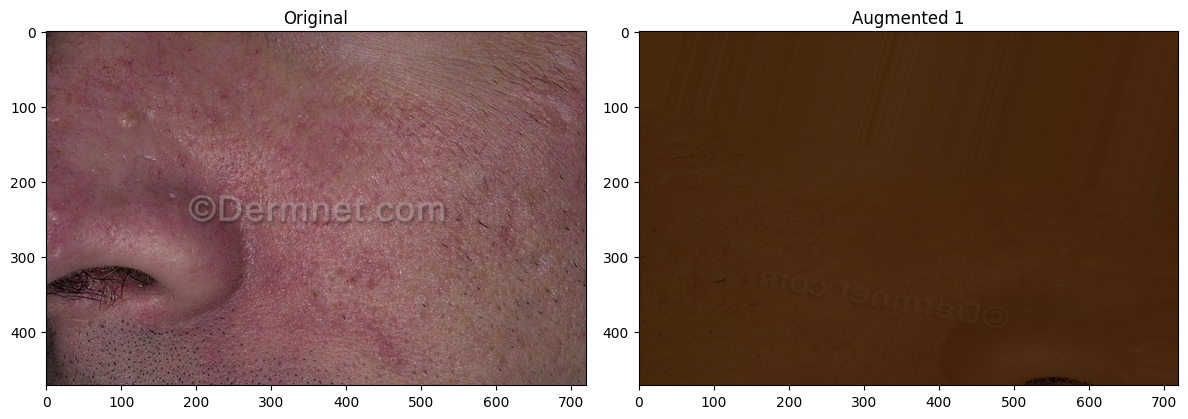

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def change_skin_color_and_augment(directory_path, alpha=0.7, img_size=300, num_augmentations=1,
                                  skincolor_low=np.array([0, 10, 60]), skincolor_high=np.array([180, 150, 255]),
                                  desired_color_brg=(2, 70, 140)):
    # Get a list of image files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"No image files found in {directory_path}")
        return None

    # Calculate the number of images for 20% and 5% of the directory
    num_selected_images_20percent = int(0.2 * len(image_files))
    num_selected_images_5percent = 5

    # Choose 20% of images randomly from the directory
    selected_image_files = np.random.choice(image_files, num_selected_images_20percent, replace=False)

    print(f"Number of images in {directory_path}: {len(image_files)}")
    print(f"Number of images for skin color change and augmentation (20%): {num_selected_images_20percent}")
    print(f"Number of images to plot (5%): {num_selected_images_5percent}")

    selected_image_files_5percent = selected_image_files[:num_selected_images_5percent]

    for img_filename in selected_image_files_5percent:
        img_path = os.path.join(directory_path, img_filename)

        # Read the input face image
        img_main_face = cv2.imread(img_path)

        # Convert BGR to HSV
        hsv = cv2.cvtColor(img_main_face, cv2.COLOR_BGR2HSV)

        # Create the HSV mask
        mask = cv2.inRange(hsv, skincolor_low, skincolor_high)

        # Change image to brown where we found pink
        img_main_face[mask > 0] = desired_color_brg

        # Blending block start
        # Load images for blending
        src1 = img_main_face
        src2 = cv2.imread(img_path)

        if src2 is None:
            print("Error loading src2")
            return None

        # Actually blend images
        result_final = cv2.addWeighted(src1, alpha, src2, 1 - alpha, 0.0)
        # Blending block end

        # Data augmentation
        datagen = ImageDataGenerator(
            rescale=(1./255),
            shear_range=0.2,
            zoom_range=0.3,
            width_shift_range=0.2,
            height_shift_range=0.2,
            brightness_range=[0.2, 1.2],
            rotation_range=20,
            horizontal_flip=True,
        )

        img_array = np.expand_dims(result_final, axis=0)
        augmented_images = []

        for _ in range(num_augmentations):
            augmented_img = datagen.flow(img_array).next()[0]
            augmented_images.append(augmented_img)

        # Plotting the original and augmented images
        plt.figure(figsize=(12, 6))

        # Original image
        plt.subplot(1, num_augmentations + 1, 1)
        plt.imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))
        plt.title('Original')

        # Augmented images
        for i in range(num_augmentations):
            plt.subplot(1, num_augmentations + 1, i + 2)
            plt.imshow(cv2.cvtColor(augmented_images[i], cv2.COLOR_BGR2RGB))
            plt.title(f'Augmented {i + 1}')

        plt.tight_layout()
        plt.show()

# Example usage:
directory_path = "./data/archive/train/Acne and Rosacea Photos/"
change_skin_color_and_augment(directory_path)
